# Data Research Engineer Assignment Task Two

This notebook contains work on the two take home tasks for the Data Research Engineer role.

### Task Two Description

The motivation behind this task is the need for clean, high-quality datasets on which to train large machine learning models. The task itself is about producing a high-quality English-language news summarisation dataset, to be used for training a text summarisation model.

This dataset contains three columns: url, scraped_article, and summary. It has 40,000 rows
of text data. The three columns for each data point are defined as follows:
- `url`: The URL of an online news article.
- `scraped_article`: The text obtained from scraping the web page at the given URL, using a generic news article web scraper [note: no specific web scraping knowledge is required].
- `summary`: A summary of the article, written by a human, based on the original web page (i.e.
not based on the scraped text).

Your task is to explore the data and outline the steps you would take to pre-process the data in order to improve the quality of the dataset for model training. Note that removal of data points is perfectly acceptable — we don’t expect the processed dataset to be the same size as the original (assume for the purpose of this task that we are not short of data).

## The code

In [1]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the data is always the first step:

In [2]:
dataset_2 = pd.read_csv('data_task_2.csv')
dataset_2

,url,scraped_article,summary
0,https://www.independent.co.uk/news/world/europ...,Halal and kosher meat cannot be labelled organ...,Animals must be stunned prior to being killed ...
1,https://techxplore.com/news/2018-07-bacteria-p...,Credit: CC0 Public Domain University of Britis...,Researchers in Canada have developed an innova...
2,http://www.themalaymailonline.com/malaysia/art...,While IS is rapidly losing territory in Iraq a...,Southeast Asia is unprepared for the rapidly-r...
3,http://www.scotsman.com/business/companies/ret...,Tool rental firm Speedy Hire has brushed aside...,In addition to calls from Toscafund to oust it...
4,http://www.wsj.com/articles/transferwise-plans...,LONDON—U.K. payments startup TransferWise is o...,TransferWise has announced plans to launch a c...
...,...,...,...
39995,https://www.irishtimes.com/business/hammond-ta...,Philip Hammond is set to increase the tax paid...,UK Chancellor Philip Hammond is expected to in...
39996,http://www.tmcnet.com/usubmit/2015/07/30/82257...,"[July 30, 2015] Livongo Health Selects Liaison...",Livongo Health empowers people who have chroni...
39997,https://chemicalwatch.com/65818/furniture-flam...,Feature: Furniture flame retardants in focus A...,The capacity for flame retardants (FRs) to pro...
39998,https://www.insurancebusinessmag.com/asia/news...,"AXA Insurance has launched AXA Affiliates, a d...","AXA Insurance has launched a one-stop, self-se..."


Not much to comment on yet.
- I can see that I can use the urls to organise the articles by domain. 
- The summaries appear decent.

Now it makes sense to look at a random sample.

In [3]:
dataset_2.sample(10)

,url,scraped_article,summary
13855,https://www.nationaljeweler.com/majors/market-...,"Beverly Hills, California—Barneys New York is ...",Luxury department store chain Barneys New York...
24165,https://www.goal.com/en/news/egypt-beat-south-...,Egypt beat South Africa to win rights to host ...,The Confederation of African Football (CAF) ha...
36880,https://www.nytimes.com/2017/09/23/technology/...,James Damore was fired by Google last month af...,Women working in Silicon Valley are facing a b...
4431,https://qz.com/1228180/crypto-exchange-coinbas...,Coinbase is ramping up its hiring in London—Br...,Cryptocurrency exchange Coinbase is hiring ext...
2901,https://www.thehindu.com/todays-paper/tp-natio...,In a move aimed at bringing technology to the ...,India's Guntur District Cooperative Central Ba...
36093,http://www.aafp.org/news/practice-professional...,As federal lawmakers consider the best way to ...,As federal lawmakers consider the best way to ...
2732,https://www.engadget.com/2019/01/20/facebook-t...,Facebook is providing an initial grant of $7.5...,Facebook is partnering with the Technical Univ...
13863,http://ca.reuters.com/article/sportsNews/idCAK...,NEW YORK (Reuters) - A federal judge has dismi...,A lawsuit against Bank of America and Merrill ...
10305,http://finance.yahoo.com/news/van-eck-global-s...,Van Eck Global’s attempt to capitalize the sma...,Van Eck Global is closing down four of its sma...
35853,https://www.greentechmedia.com/articles/read/n...,Natural-gas power generation in the U.S. saw i...,"For the first time in a decade, net generation..."


I can see that not all of the articles are in English. Since the problem set asks for an English text summarisation model, it makes sense to filter those out.

Since we can see some missing values, lets quickly examine missingness as well:

In [4]:
# Count missing values by column
dataset_2.apply(lambda x: x.isna()).agg('sum')

url                  0
scraped_article    948
summary             11
dtype: int64

So there are some missing articles. We could try rescraping those at some point, but for now lets just remove them.

In [5]:
no_missingness = dataset_2.apply(lambda x: x.isna()).apply(lambda x: ~(x.url | x.scraped_article | x.summary), axis=1)
dataset_2 = dataset_2[no_missingness].reset_index(drop=True)

In [6]:
dataset_2

,url,scraped_article,summary
0,https://www.independent.co.uk/news/world/europ...,Halal and kosher meat cannot be labelled organ...,Animals must be stunned prior to being killed ...
1,https://techxplore.com/news/2018-07-bacteria-p...,Credit: CC0 Public Domain University of Britis...,Researchers in Canada have developed an innova...
2,http://www.themalaymailonline.com/malaysia/art...,While IS is rapidly losing territory in Iraq a...,Southeast Asia is unprepared for the rapidly-r...
3,http://www.scotsman.com/business/companies/ret...,Tool rental firm Speedy Hire has brushed aside...,In addition to calls from Toscafund to oust it...
4,http://www.wsj.com/articles/transferwise-plans...,LONDON—U.K. payments startup TransferWise is o...,TransferWise has announced plans to launch a c...
...,...,...,...
39036,https://www.irishtimes.com/business/hammond-ta...,Philip Hammond is set to increase the tax paid...,UK Chancellor Philip Hammond is expected to in...
39037,http://www.tmcnet.com/usubmit/2015/07/30/82257...,"[July 30, 2015] Livongo Health Selects Liaison...",Livongo Health empowers people who have chroni...
39038,https://chemicalwatch.com/65818/furniture-flam...,Feature: Furniture flame retardants in focus A...,The capacity for flame retardants (FRs) to pro...
39039,https://www.insurancebusinessmag.com/asia/news...,"AXA Insurance has launched AXA Affiliates, a d...","AXA Insurance has launched a one-stop, self-se..."


Some more thoughts:
- It might be helpful to arrange the `scraped_article`s into clusters for resampling.
- We should make some embeddings
- Maybe try a weak model to pair articles to summaries
- We might want to keep, downsample or remove certain clusters based on redundancy, or other things.
- It's worth looking into the `summary`s as well, to make sure the human labelled data is good quality.

Since these all sound involved, it's making sure we've done the easy things first. So summarising the urls makes sense.

In [7]:
from urllib.parse import urlparse

domain = urlparse('http://www.example.test/foo/bar').netloc
print(domain)

www.example.test


In [8]:
dataset_2['domain'] = dataset_2.url.apply(lambda x: urlparse(x).netloc.replace('www.', ''))

In [9]:
# Show the top 30 most common domains
domain_counts = dataset_2.groupby('domain').size().sort_values(ascending=False)
domain_counts.head(30)

domain
reuters.com                 1730
theguardian.com             1518
techcrunch.com              1025
uk.reuters.com               917
bbc.co.uk                    833
telegraph.co.uk              509
wsj.com                      487
forbes.com                   450
digiday.com                  436
cnbc.com                     412
pv-magazine.com              347
venturebeat.com              334
nytimes.com                  332
thetimes.co.uk               310
zdnet.com                    309
thedrum.com                  307
qz.com                       296
scmp.com                     291
engadget.com                 285
theverge.com                 270
uk.businessinsider.com       257
finextra.com                 241
pv-tech.org                  222
ibtimes.co.uk                221
dailymail.co.uk              202
insurancebusinessmag.com     195
cityam.com                   186
greencarcongress.com         184
independent.co.uk            176
mediapost.com                174
dty

I did a quick google for any places I didn't recognise, but these places all seem fairly normal. We can check the tail as well.

In [10]:
domain_counts.tail(30)

domain
htsyndication.com       1
huawei.com              1
hubbis.com              1
hoodline.com            1
homesgofast.com         1
homecaredaily.com       1
heraldsun.com           1
healthintelasia.com     1
healthinvestor.co.uk    1
healthitoutcomes.com    1
healthmedicinet.com     1
healthy.kudika.ro       1
heatst.com              1
hedgethink.com          1
henleystandard.co.uk    1
herald-review.com       1
herald.co.zw            1
highbeam.com            1
home.autonews.com       1
hiphopdx.com            1
hiveblockchain.com      1
hk-lawyer.org           1
hkma.gov.hk             1
hngn.com                1
hnworth.com             1
hola.com                1
hollandfintech.com      1
holmesreport.com        1
holyrood.com            1
zoopla.co.uk            1
dtype: int64

Here we can see some of the non-english locations factoring in. I think I'll add a column inferring country code from the scraped articles and group by that next.

In [11]:
import fasttext

In [12]:
lang_model = fasttext.load_model('/home/kaimahi/.models/lid.176.ftz')

In [13]:
def infer_lang(text):
    '''
    Infer the language of a text string and return both the label and a confidence score
    '''
    lang, prob = lang_model.predict(text)
    prob = prob[0]
    lang = lang[0].replace('__label__', '')
    return lang, prob

In [14]:
dataset_2['lang'] = dataset_2.scraped_article.apply(infer_lang)
dataset_2['lang_confidence'] = dataset_2.lang.apply(lambda x: x[1])
dataset_2['lang'] = dataset_2.lang.apply(lambda x: x[0])

In [15]:
dataset_2.head()

,url,scraped_article,summary,domain,lang,lang_confidence
0,https://www.independent.co.uk/news/world/europ...,Halal and kosher meat cannot be labelled organ...,Animals must be stunned prior to being killed ...,independent.co.uk,en,0.925835
1,https://techxplore.com/news/2018-07-bacteria-p...,Credit: CC0 Public Domain University of Britis...,Researchers in Canada have developed an innova...,techxplore.com,en,0.951695
2,http://www.themalaymailonline.com/malaysia/art...,While IS is rapidly losing territory in Iraq a...,Southeast Asia is unprepared for the rapidly-r...,themalaymailonline.com,en,0.963330
3,http://www.scotsman.com/business/companies/ret...,Tool rental firm Speedy Hire has brushed aside...,In addition to calls from Toscafund to oust it...,scotsman.com,en,0.983317
4,http://www.wsj.com/articles/transferwise-plans...,LONDON—U.K. payments startup TransferWise is o...,TransferWise has announced plans to launch a c...,wsj.com,en,0.915350


In [16]:
dataset_2.lang.value_counts()

en    38804
es       62
de       47
pt       32
fr       26
nl       15
it       13
pl        8
ru        4
id        3
hu        3
he        3
no        3
ko        3
ja        2
sv        2
da        1
tr        1
ro        1
ar        1
ca        1
zh        1
cs        1
fi        1
el        1
lt        1
vi        1
Name: lang, dtype: int64

In [17]:
dataset_2[dataset_2.lang != 'en']

,url,scraped_article,summary,domain,lang,lang_confidence
6,http://www.vanitatis.elconfidencial.com/estilo...,La flacidez en la papada y los pliegues vertic...,Soft Silhouette can be used to treat sagging j...,vanitatis.elconfidencial.com,es,0.960453
16,https://www.vg.hu/vallalatok/vallalati-hirek/a...,A jól ismert Regus után az IWG megnyitja az el...,Spaces is opening its first two co-working cen...,vg.hu,hu,0.993592
51,https://www.lifepr.de/inaktiv/patrizia-immobil...,× QR-Code Was ist der QR-Code? 3 Schritte: Ein...,Patrizia has sold Peter House to BP Pension Fu...,lifepr.de,de,0.998775
121,https://www.nieuwsblad.be/cnt/dmf20190801_0453...,Na coworking wint ook costuderen aan popularit...,IWG is offering students free use of more than...,nieuwsblad.be,nl,0.949118
197,https://www.ejeprime.com/empresa/nuevo-inquili...,La compañía invertirá dos millones de euros en...,"Spaces has leased 4,000 sqm in Castellana 81, ...",ejeprime.com,es,0.968377
...,...,...,...,...,...,...
37890,https://www.ultimahora.com/petroleras-proyecta...,"Al menos cinco empresas, que ya tienen concesi...",Five companies have been named as oil explorat...,ultimahora.com,es,0.970096
38615,http://www.blackboard.com/news-and-events/pres...,La página que usted está buscando no existe o ...,"Blackboard’s incoming president and CEO, Willi...",blackboard.com,es,0.941775
38725,https://www.observatoiredelafranchise.fr/dossi...,Dossiers de la franchise Tous les indicateurs ...,"Regus is to appear at the Franchise Expo, held...",observatoiredelafranchise.fr,fr,0.983290
38765,http://www.wscom.com.br/noticias/politica/faze...,Créditos: Wilson Dias/Agência Brasil O Ministé...,The Brazilian finance minister has named Paulo...,wscom.com.br,pt,0.989737


Looks like it worked pretty well. I wouldn't be surprised if the actual model was trained on this same data however.

So now we can filter by English only, and we've already improved our dataset! But before we do that, lets just take a look at the confidence scores on the english text and see if there's anything strange:

<AxesSubplot:>

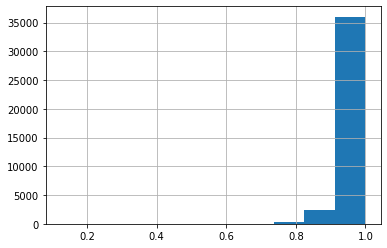

In [18]:
dataset_2.loc[dataset_2.lang == 'en', 'lang_confidence'].hist()

In [19]:
dataset_2.loc[(dataset_2.lang == 'en') & (dataset_2.lang_confidence < 0.8), 
              ['scraped_article', 'lang_confidence']]

,scraped_article,lang_confidence
191,Advertising for an auction at Christie’s in Ne...,0.752871
542,Shortlist announced for BCI Global Awards Deta...,0.790529
1104,⚠ Javascript Error Javascript is deactivated i...,0.768626
1333,"1. Elliston, B., MacGill, I. & Diesendorf, M. ...",0.666559
1511,Nov 23 (Reuters) - Alcatel-Lucent SA : * Alcat...,0.638701
...,...,...
38406,North American Project to Evaluate Soil Health...,0.763556
38488,Know Your Value,0.165333
38670,To experience the full functionality of the IS...,0.718330
38723,This rendered image shows how LeTV's first ele...,0.753333


At least they're still English, but you can see that the content is definitely a little stranger in this part of the data.

There's a Javascript Error, for one example. It would be worth adding a catch to remove that sort of data. Lets look at the bottom 30 articles by language confidence score:

In [20]:
dataset_2.loc[(dataset_2.lang == 'en') & (dataset_2.lang_confidence < 0.8), 
              ['scraped_article', 'lang_confidence']].sort_values('lang_confidence').head(30)

,scraped_article,lang_confidence
3363,Read Less Go More,0.124504
37015,Read Less Go More,0.124504
31705,"If you dont get automatically redirected, clic...",0.152716
15970,Know Your Value,0.165333
38488,Know Your Value,0.165333
23978,Know Your Value,0.165333
29246,Know Your Value,0.165333
22928,Know Your Value,0.165333
31310,Know Your Value,0.165333
28367,"; font-size: 12pt; font-weight: bold;""> WASHIN...",0.232170


Now we can see some repetitions, and a bit of html code as well. Some of these errors (e.g. repetitions, and very strange text such as code) could probably be picked up by a clustering model.

The repetitions are worth removing now however. We can filter the text so each unique scraped article text appears exactly once. We should normalise the text before we apply that filter as well.

In [21]:
def clean_affiliations(col):
    col = F.regexp_replace(col, '[\.,\-\/\(\)\r]', ' ')
    col = F.regexp_replace(col, '\s{2,}', ' ')
    col = F.regexp_replace(col, '&amp;', '&')
    col = F.trim(col)
    col = F.lower(col)
    col = F.when(col == "", None).otherwise(col)
    return col

In [22]:
def normalise_article(article):
    article = article.lower()
    article = re.sub('[^a-z]', ' ', article)
    article = re.sub('\s{2,}', ' ', article)
    article = article.strip()
    return article

dataset_2['normalised_article'] = dataset_2.scraped_article.apply(normalise_article)

In [23]:
dataset_2[['scraped_article', 'normalised_article']]

,scraped_article,normalised_article
0,Halal and kosher meat cannot be labelled organ...,halal and kosher meat cannot be labelled organ...
1,Credit: CC0 Public Domain University of Britis...,credit cc public domain university of british ...
2,While IS is rapidly losing territory in Iraq a...,while is is rapidly losing territory in iraq a...
3,Tool rental firm Speedy Hire has brushed aside...,tool rental firm speedy hire has brushed aside...
4,LONDON—U.K. payments startup TransferWise is o...,london u k payments startup transferwise is op...
...,...,...
39036,Philip Hammond is set to increase the tax paid...,philip hammond is set to increase the tax paid...
39037,"[July 30, 2015] Livongo Health Selects Liaison...",july livongo health selects liaison technologi...
39038,Feature: Furniture flame retardants in focus A...,feature furniture flame retardants in focus a ...
39039,"AXA Insurance has launched AXA Affiliates, a d...",axa insurance has launched axa affiliates a di...


In [24]:
# Keep only one copy of each article after normalisation
dataset_2 = dataset_2.groupby('normalised_article').head(1)

In [25]:
# Keep only the english articles
dataset_2 = dataset_2[dataset_2.lang == 'en']

Now we can have a second look at those articles with poor language confidence scores:

In [26]:
dataset_2.sort_values('lang_confidence').head(10)

,url,scraped_article,summary,domain,lang,lang_confidence,normalised_article
3363,http://www.fiercemedicaldevices.com/story/illu...,Read Less Go More,Illumina’s accelerator is investing in four ne...,fiercemedicaldevices.com,en,0.124504,read less go more
31705,https://torque-expo.com/allianz-launches-produ...,"If you dont get automatically redirected, clic...",Allianz Global Corporate & Specialty SE (AGCS)...,torque-expo.com,en,0.152716,if you dont get automatically redirected click...
15970,http://www.nbcnews.com/news/latino/maldef-sues...,Know Your Value,Legal and civil rights group the Mexican Ameri...,nbcnews.com,en,0.165333,know your value
28367,http://www.4-traders.com/HUMANA-INC-13000/news...,"; font-size: 12pt; font-weight: bold;""> WASHIN...",Ohio-based healthcare provider the Cleveland C...,4-traders.com,en,0.232170,font size pt font weight bold washington dc sp...
31058,http://www.abc.net.au/news/2015-12-17/tax-tran...,Zero tax: Data reveals how much tax major Aust...,The Australian Tax Office has named 579 major ...,abc.net.au,en,0.350717,zero tax data reveals how much tax major austr...
10957,http://www.htsyndication.com/htsportal/ht-mumb...,"× Need Images, Write to us × Invalid Inputs Yo...",Spaces has opened two centres in Bengaluru cov...,htsyndication.com,en,0.361076,need images write to us invalid inputs your na...
5341,http://newagebd.net/168989/smartphone-based-sh...,Exception,Investors in Bangladesh will be able to trade ...,newagebd.net,en,0.437069,exception
7384,http://www.pymnts.com/news/2017/apple-pay-ipho...,3.6K Artificial Intelligence Why AI’s Early Ad...,Apple will allow third-party developers to acc...,pymnts.com,en,0.459520,k artificial intelligence why ai s early adopt...
8464,https://www.reuters.com/article/brief-swiss-re...,Nov 1 (Reuters) - Swiss Re AG: * SWISS RE CFO ...,Swiss Re CFO John Dacey has predicted reinsura...,reuters.com,en,0.497160,nov reuters swiss re ag swiss re cfo says gene...
20631,http://www.wallstreet-online.de/nachricht/9226...,× Artikel versenden DGAP-News Hypoport strengt...,Berlin-based technology-focused financial serv...,wallstreet-online.de,en,0.517810,artikel versenden dgap news hypoport strengthe...


That article with the code is still bothering me, but it would be hard to write a rule to get rid of this problem exactly so I'll write something hard just to catch it and then move on.

In [27]:
# Drop the entry with html code in it
dataset_2 = dataset_2[~dataset_2.scraped_article.str.contains('font-size:')]

# Reset the index
dataset_2 = dataset_2.reset_index(drop=True)

In [28]:
# Show the row count
print(f"dataset_2 contains {len(dataset_2)} rows")

dataset_2 contains 36564 rows


## Training word embeddings

So far we've removed only 3,436 rows from the data. It's probably time to try an embeddings approach.

As a first go, I like to just train word2vec without a pretrained model. At 40,000 articles, we have enough data to do this. And usefully we've already normalised the text as well.

For a second go, I would use a pretrained model. I just prefer to train from scratch first so I can get a picture of the text without the influence of any external data.

In [29]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

Normally I'd pre-apply a phrase model and some other things before running this but for the sake of time I'll just go for it.

In [32]:
%%time
documents = [TaggedDocument(doc, [i]) \
             for i, doc in enumerate(dataset_2.normalised_article)]

d2v_model_path = 'd2v_model.pkl'
if not os.path.exists(d2v_model_path):
    d2v_model = Doc2Vec(
        documents,
        vector_size=100,
        window=5,
        min_count=10,
        workers=15)
    d2v_model.save('d2v_model.pkl')
d2v_model = Doc2Vec.load(d2v_model_path)

CPU times: user 89.3 ms, sys: 4.07 ms, total: 93.3 ms
Wall time: 91.8 ms


This model is taking a while to run, so I'll just explain that the goal is to acquire document vectors and after visualising them using `umap` or `tsne`, arrange them into clusters using `dbscan` or similar.

Once that's done, then I can assess the clusters by hand and design a new sampling frame around clusters that the model has inferred.

In [69]:
dataset_2['embedding'] = dataset_2.normalised_article.str.split().apply(d2v_model.infer_vector)

In [72]:
dataset_2[['normalised_article', 'embedding']]

,normalised_article,embedding
0,halal and kosher meat cannot be labelled organ...,"[-0.066765256, -0.05571471, -0.037469618, 0.03..."
1,credit cc public domain university of british ...,"[0.025265094, -0.023947164, -0.03545575, 0.006..."
2,while is is rapidly losing territory in iraq a...,"[0.03005387, -0.03912826, -0.030812867, 0.0167..."
3,tool rental firm speedy hire has brushed aside...,"[0.02078533, -0.04121026, -0.035014547, 0.0193..."
4,london u k payments startup transferwise is op...,"[0.01685734, -0.05238565, -0.046165984, 0.0350..."
...,...,...
36559,philip hammond is set to increase the tax paid...,"[-0.004437971, -0.053170588, -0.028134186, 0.0..."
36560,july livongo health selects liaison technologi...,"[0.028456226, -0.047267012, -0.031278554, 0.01..."
36561,feature furniture flame retardants in focus a ...,"[0.031873252, -0.025461791, -0.025273478, 0.02..."
36562,axa insurance has launched axa affiliates a di...,"[0.028530475, -0.036910236, -0.046447918, 0.01..."


In [73]:
from sklearn.manifold import TSNE

In [77]:
reduced_embeddings = TSNE(
    n_components=2, learning_rate='auto', init='random'
).fit_transform(np.stack(dataset_2.embedding))

In [79]:
dataset_2['X'] = reduced_embeddings[:,0]
dataset_2['Y'] = reduced_embeddings[:,1]

<AxesSubplot:xlabel='X', ylabel='Y'>

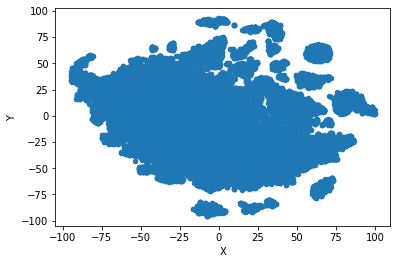

In [83]:
dataset_2.plot(kind='scatter', x='X', y='Y')

We can see a bunch of distinct clusters. It would be worthwhile investigating these visually to see what patterns exist in the data. But next, I would try clustering with dbscan.

## Further concerns

Other things that I would like to look into if I had more time:
- Quality checking for human labelled data
- General Toxicity
- Discrimiation
- Misinformation

Of course you would want to identify any summaries that misrepresent the provided article or are wildly incorrect.

We could investigate toxicity by applying language models trained to detect such text such as Perspective API.

Discrimination could be investigated by fine-tuning an existing language model to this text and studying the generated text. For example, we could look at the use of language involving minority communities and other people and see how the language model responds.

Misinformation could require a second dataset. For example, a knowledge graph could be compared with the text and then the language model could be required to reconstruct the knowledge graph in a question-answering fashion.